<a href="https://colab.research.google.com/github/gabrielfernandorey/GGGR/blob/main/Arboles/SRT%20v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SRT v3 - Ensayo
### Arboles de regresion - Datos reales

In [1]:
import random
import string
import pandas as pd
import numpy as np
from datetime import date

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


### Importamos Datos

In [2]:
!wget https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/cod_postal_series.csv

--2023-05-04 17:53:52--  https://raw.githubusercontent.com/gabrielfernandorey/GGGR/main/Regresion%20lineal/cod_postal_series.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2977660 (2.8M) [text/plain]
Saving to: ‘cod_postal_series.csv’

cod_postal_series.c 100%[===================>]   2.84M  --.-KB/s    in 0.07s   

2023-05-04 17:53:52 (38.9 MB/s) - ‘cod_postal_series.csv’ saved [2977660/2977660]



In [3]:
df = pd.read_csv('/content/cod_postal_series.csv', header=0,
                 names=['codigo','año','mes','total_cp'],
                 dtype={'codigo': str, 'año': str, 'mes': str, 'total_cp': str})

In [4]:
df.head()

,codigo,año,mes,total_cp
0,0,2022.0,1,208
1,0,2022.0,2,185
2,0,2022.0,3,289
3,0,2022.0,4,177
4,0,2022.0,5,177


### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147066 entries, 0 to 147065
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   codigo    147066 non-null  object
 1   año       147066 non-null  object
 2   mes       147066 non-null  object
 3   total_cp  147066 non-null  object
dtypes: object(4)
memory usage: 4.5+ MB


#### Ajustamos tipo de datos

In [6]:
df['año'] = pd.to_numeric(df['año'], downcast='integer') #corregimos el formato de la columna 

In [7]:
df['mes'] = pd.to_numeric(df['mes']) #corregimos el formato de la columna 

In [8]:
df['total_cp'] = pd.to_numeric(df['total_cp']) #corregimos el formato de la columna 

In [9]:
df.dtypes

codigo      object
año          int16
mes          int64
total_cp     int64
dtype: object

In [10]:
df.head()

,codigo,año,mes,total_cp
0,0,2022,1,208
1,0,2022,2,185
2,0,2022,3,289
3,0,2022,4,177
4,0,2022,5,177


In [11]:
df.sort_values(['año','mes'], ascending=True)

,codigo,año,mes,total_cp
0,0,2022,1,208
33,01000000,2022,1,19
49,01001000,2022,1,172
65,01002000,2022,1,20
81,01003000,2022,1,7
...,...,...,...,...
146965,Z9050DJG,2023,4,1
146969,Z9303XAT,2023,4,1
146971,Z9310BDE,2023,4,1
146990,Z9400BJA,2023,4,1


#### Verificamos cantidad de registros por codigo

In [12]:
codigos = df.value_counts('codigo')

In [13]:
mayores_a_15 = codigos[codigos > 15]

In [14]:
df = df[df['codigo'].isin(mayores_a_15.index)]

In [15]:
df

,codigo,año,mes,total_cp
0,0,2022,1,208
1,0,2022,2,185
2,0,2022,3,289
3,0,2022,4,177
4,0,2022,5,177
...,...,...,...,...
146961,Z9050DJG,2022,12,2
146962,Z9050DJG,2023,1,2
146963,Z9050DJG,2023,2,6
146964,Z9050DJG,2023,3,1


### Transformacion

#### LabelEncoder

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
# Crear una instancia de OneHotEncoder
encoder = LabelEncoder()

In [18]:
# Codificar los valores alfanuméricos
X_encoded = encoder.fit_transform(df.codigo.values.reshape(-1,))

In [19]:
X_encoded.shape

(25440,)

In [20]:
pd.DataFrame(X_encoded)

,0
0,0
1,0
2,0
3,0
4,0
...,...
25435,1589
25436,1589
25437,1589
25438,1589


#### Embeddings

In [21]:
tamano_embedding = 10

In [22]:
matriz_embedding = np.random.rand(len(encoder.classes_), tamano_embedding)

In [23]:
matriz_embedding

array([[0.9972881 , 0.72233924, 0.49182979, ..., 0.88863781, 0.69317164,
        0.62230811],
       [0.51032343, 0.65583849, 0.10267409, ..., 0.6957942 , 0.02132704,
        0.51997728],
       [0.78814412, 0.45233526, 0.3380074 , ..., 0.04235339, 0.91624229,
        0.70736322],
       ...,
       [0.83825385, 0.70435301, 0.71854348, ..., 0.3023683 , 0.76401081,
        0.77783333],
       [0.36578891, 0.42850548, 0.80623576, ..., 0.22089083, 0.32580229,
        0.8933824 ],
       [0.67077806, 0.35671467, 0.74049862, ..., 0.9087803 , 0.4662387 ,
        0.54555108]])

In [24]:
encoder.classes_

array(['0', '01000000', '01001000', ..., 'Y4612JYI', 'Y4612XAI',
       'Z9050DJG'], dtype=object)

In [25]:
# Vectores de embeddings asociados a un valor por cada atributo
atributos_embeddings = matriz_embedding[X_encoded]

In [26]:
atributos_embeddings.shape

(25440, 10)

#### Verificacion embeddings

In [27]:
i = 0
encoder.classes_[i]

'0'

In [28]:
matriz_embedding[i]

array([0.9972881 , 0.72233924, 0.49182979, 0.48438267, 0.30315496,
       0.89499204, 0.64328349, 0.88863781, 0.69317164, 0.62230811])

In [29]:
matriz_embedding.shape

(1590, 10)

#### Dataframe con datos de embeddings

In [30]:
# Creamos un nuevo dataframe con los valores del embedding
embedding_df = pd.DataFrame(matriz_embedding, columns=[f'emb_{i}' for i in range(matriz_embedding.shape[1])])

In [31]:
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308
1,0.510323,0.655838,0.102674,0.804542,0.425487,0.969067,0.802337,0.695794,0.021327,0.519977
2,0.788144,0.452335,0.338007,0.441840,0.056449,0.944821,0.179504,0.042353,0.916242,0.707363
3,0.756796,0.765164,0.449317,0.206615,0.605037,0.715834,0.713558,0.672896,0.835298,0.619509
4,0.468919,0.612125,0.511812,0.665943,0.174710,0.120879,0.137432,0.087904,0.412039,0.510312
...,...,...,...,...,...,...,...,...,...,...
1585,0.140246,0.064964,0.434317,0.350513,0.053225,0.073855,0.559453,0.171776,0.260084,0.780671
1586,0.876218,0.336936,0.606793,0.933386,0.530643,0.352442,0.335586,0.903331,0.344642,0.477357
1587,0.838254,0.704353,0.718543,0.540439,0.384442,0.698131,0.314242,0.302368,0.764011,0.777833
1588,0.365789,0.428505,0.806236,0.007564,0.284903,0.359390,0.091089,0.220891,0.325802,0.893382


In [32]:
embedding_df['codigo'] = encoder.classes_

In [33]:
# Utilizamos el codigo como indice (para joinear)
embedding_df = embedding_df.set_index('codigo')
embedding_df

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9
codigo,,,,,,,,,,
0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308
01000000,0.510323,0.655838,0.102674,0.804542,0.425487,0.969067,0.802337,0.695794,0.021327,0.519977
01001000,0.788144,0.452335,0.338007,0.441840,0.056449,0.944821,0.179504,0.042353,0.916242,0.707363
01002000,0.756796,0.765164,0.449317,0.206615,0.605037,0.715834,0.713558,0.672896,0.835298,0.619509
01003000,0.468919,0.612125,0.511812,0.665943,0.174710,0.120879,0.137432,0.087904,0.412039,0.510312
...,...,...,...,...,...,...,...,...,...,...
Y4604CJC,0.140246,0.064964,0.434317,0.350513,0.053225,0.073855,0.559453,0.171776,0.260084,0.780671
Y4610XAH,0.876218,0.336936,0.606793,0.933386,0.530643,0.352442,0.335586,0.903331,0.344642,0.477357
Y4612JYI,0.838254,0.704353,0.718543,0.540439,0.384442,0.698131,0.314242,0.302368,0.764011,0.777833


In [34]:
# Utilizamos el codigo como indice (para joinear)
df = df.set_index('codigo')
df

,año,mes,total_cp
codigo,,,
0,2022,1,208
0,2022,2,185
0,2022,3,289
0,2022,4,177
0,2022,5,177
...,...,...,...
Z9050DJG,2022,12,2
Z9050DJG,2023,1,2
Z9050DJG,2023,2,6


In [35]:
df.total_cp.max()

5314

#### Transformar la variable de salida

In [36]:
mmscaler = MinMaxScaler()

In [37]:
df['total_cp'] = mmscaler.fit_transform(df['total_cp'].values.reshape(-1,1))

In [38]:
df.head()

,año,mes,total_cp
codigo,,,
0,2022,1,0.038961
0,2022,2,0.034632
0,2022,3,0.054207
0,2022,4,0.033126
0,2022,5,0.033126


#### Joins de Dataframes

In [39]:
df_join = embedding_df.join(df, lsuffix='_izq', rsuffix='_der')
df_join

,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
codigo,,,,,,,,,,,,,
0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308,2022,1,0.038961
0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308,2022,2,0.034632
0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308,2022,3,0.054207
0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308,2022,4,0.033126
0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z9050DJG,0.670778,0.356715,0.740499,0.282629,0.124600,0.505185,0.269567,0.908780,0.466239,0.545551,2022,12,0.000188
Z9050DJG,0.670778,0.356715,0.740499,0.282629,0.124600,0.505185,0.269567,0.908780,0.466239,0.545551,2023,1,0.000188
Z9050DJG,0.670778,0.356715,0.740499,0.282629,0.124600,0.505185,0.269567,0.908780,0.466239,0.545551,2023,2,0.000941


#### Datos de entrenamiento

In [40]:
df_final = df_join.reset_index()
df_final

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
0,0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308,2022,1,0.038961
1,0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308,2022,2,0.034632
2,0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308,2022,3,0.054207
3,0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308,2022,4,0.033126
4,0,0.997288,0.722339,0.491830,0.484383,0.303155,0.894992,0.643283,0.888638,0.693172,0.622308,2022,5,0.033126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25435,Z9050DJG,0.670778,0.356715,0.740499,0.282629,0.124600,0.505185,0.269567,0.908780,0.466239,0.545551,2022,12,0.000188
25436,Z9050DJG,0.670778,0.356715,0.740499,0.282629,0.124600,0.505185,0.269567,0.908780,0.466239,0.545551,2023,1,0.000188
25437,Z9050DJG,0.670778,0.356715,0.740499,0.282629,0.124600,0.505185,0.269567,0.908780,0.466239,0.545551,2023,2,0.000941
25438,Z9050DJG,0.670778,0.356715,0.740499,0.282629,0.124600,0.505185,0.269567,0.908780,0.466239,0.545551,2023,3,0.000000


In [41]:
X_data = df_final.drop(['codigo','total_cp'], axis=1).to_numpy()

In [42]:
X_data.shape

(25440, 12)

In [43]:
y_data = df_final['total_cp'].to_numpy()

In [44]:
y_data

array([0.03896104, 0.03463203, 0.05420666, ..., 0.00094109, 0.        ,
       0.        ])

In [45]:
X_train, X_test, y_train, y_test = train_test_split( X_data, y_data, test_size=0.30, random_state=43) 

### Modelo

In [46]:
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(max_depth=15)
regr_3 = RandomForestRegressor(max_depth=5)
regr_4 = ExtraTreesRegressor(max_depth=5)

### Entrenamiento

In [47]:
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_train, y_train)
regr_4.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=5)

### Validacion

##### DecisionTreeRegressor(max_depth=5)

In [48]:
pred_1_train = regr_1.predict(X_train)
pred_1_test = regr_1.predict(X_test)

In [49]:
mse_1_train = mean_squared_error(y_train, pred_1_train)
mse_1_test  = mean_squared_error(y_test, pred_1_test)

In [50]:
mse_1_train, mse_1_test

(0.00021235894805338835, 0.00015811660446849308)

In [51]:
rmse_1_train = np.sqrt(mse_1_train)
rmse_1_test  = np.sqrt(mse_1_test)
print('RMSE:', round(rmse_1_train,4), round(rmse_1_test,4))

RMSE: 0.0146 0.0126


In [52]:
score_1 = r2_score(y_test, pred_1_test)
print(f'R2 score: {score_1:.5f}')

R2 score: 0.21821


##### DecisionTreeRegressor(max_depth=15)

In [53]:
pred_2_train = regr_2.predict(X_train)
pred_2_test = regr_2.predict(X_test)

In [54]:
mse_2_train = mean_squared_error(y_train, pred_2_train)
mse_2_test  = mean_squared_error(y_test, pred_2_test)

In [55]:
mse_2_train, mse_2_test

(1.8072800399503134e-05, 0.00010929026092005595)

In [56]:
rmse_2_train = np.sqrt(mse_2_train)
rmse_2_test  = np.sqrt(mse_2_test)
print('RMSE:', round(rmse_2_train,4), round(rmse_2_test,4))

RMSE: 0.0043 0.0105


In [57]:
score_2 = r2_score(y_test, pred_2_test)
print(f'R2 score: {score_2:.5f}')

R2 score: 0.45962


##### RandomForestRegressor(max_depth=5)

In [58]:
pred_3_train = regr_3.predict(X_train)
pred_3_test = regr_3.predict(X_test)

In [59]:
mse_3_train = mean_squared_error(y_train, pred_3_train)
mse_3_test  = mean_squared_error(y_test, pred_3_test)

In [60]:
mse_3_train, mse_3_test

(0.00017402446832294377, 0.00013288472070425945)

In [61]:
rmse_3_train = np.sqrt(mse_3_train)
rmse_3_test  = np.sqrt(mse_3_test)
print('RMSE:', round(rmse_3_train,4), round(rmse_3_test,4))

RMSE: 0.0132 0.0115


In [62]:
score_3 = r2_score(y_test, pred_3_test)
print(f'R2 score: {score_3:.5f}')

R2 score: 0.34296


##### ExtraTreesRegressor(max_depth=5)

In [63]:
pred_4_train = regr_4.predict(X_train)
pred_4_test = regr_4.predict(X_test)

In [64]:
mse_4_train = mean_squared_error(y_train, pred_4_train)
mse_4_test  = mean_squared_error(y_test, pred_4_test)

In [65]:
mse_4_train, mse_4_test

(0.00024200105631414244, 0.00018706083130671844)

In [66]:
rmse_4_train = np.sqrt(mse_4_train)
rmse_4_test  = np.sqrt(mse_4_test)
print('RMSE:', round(rmse_4_train,4), round(rmse_4_test,4))

RMSE: 0.0156 0.0137


In [67]:
score_4 = r2_score(y_test, pred_4_test)
print(f'R2 score: {score_4:.5f}')

R2 score: 0.07510


### Prediccion

In [68]:
# Ingresar codigo
codigo_in = random.choice(encoder.classes_) 
new_codigo_in = encoder.transform([codigo_in])
new_codigo_embedding = matriz_embedding[new_codigo_in]


In [69]:
# Ingresar año y mes
anio_in = 2023
mes_in = 6

In [70]:
atributos_in = np.concatenate((new_codigo_embedding, anio_in, mes_in), axis=None)

In [71]:
atributos_in = atributos_in.reshape(1, 12)

In [82]:
pred = regr_2.predict(atributos_in)

In [83]:
pred = mmscaler.inverse_transform(pred.reshape(-1, 1))

In [84]:
print(f"Prediccion para el código {codigo_in} Año {anio_in} Mes {mes_in}: {np.round(pred[0][0],2)} incidentes")  

Prediccion para el código 05400000 Año 2023 Mes 6: 39.9 incidentes


### Verificacion grafica

In [85]:
filtro = df_final['codigo'] == codigo_in
df_filtrado = df_final[filtro]
df_filtrado

,codigo,emb_0,emb_1,emb_2,emb_3,emb_4,emb_5,emb_6,emb_7,emb_8,emb_9,año,mes,total_cp
6528,05400000,0.453772,0.555922,0.916904,0.594283,0.582402,0.091814,0.031852,0.125088,0.106501,0.822224,2022,1,0.030303
6529,05400000,0.453772,0.555922,0.916904,0.594283,0.582402,0.091814,0.031852,0.125088,0.106501,0.822224,2022,2,0.012234
6530,05400000,0.453772,0.555922,0.916904,0.594283,0.582402,0.091814,0.031852,0.125088,0.106501,0.822224,2022,3,0.018257
6531,05400000,0.453772,0.555922,0.916904,0.594283,0.582402,0.091814,0.031852,0.125088,0.106501,0.822224,2022,4,0.016375
6532,05400000,0.453772,0.555922,0.916904,0.594283,0.582402,0.091814,0.031852,0.125088,0.106501,0.822224,2022,5,0.016751
6533,05400000,0.453772,0.555922,0.916904,0.594283,0.582402,0.091814,0.031852,0.125088,0.106501,0.822224,2022,6,0.015998
6534,05400000,0.453772,0.555922,0.916904,0.594283,0.582402,0.091814,0.031852,0.125088,0.106501,0.822224,2022,7,0.017881
6535,05400000,0.453772,0.555922,0.916904,0.594283,0.582402,0.091814,0.031852,0.125088,0.106501,0.822224,2022,8,0.019386
6536,05400000,0.453772,0.555922,0.916904,0.594283,0.582402,0.091814,0.031852,0.125088,0.106501,0.822224,2022,9,0.019386
6537,05400000,0.453772,0.555922,0.916904,0.594283,0.582402,0.091814,0.031852,0.125088,0.106501,0.822224,2022,10,0.014681


In [86]:
df_filtrado = df_filtrado.sort_values(['año','mes'], ascending=True)

In [87]:
fechas = []
totales = []

for row in df_filtrado.iterrows():
    fechas.append(str(row[1][11])+'-'+str(row[1][12])+'-01')
    totales.append(row[1][13])

In [88]:
fechas[0]

'2022-1-01'

In [89]:
totales = mmscaler.inverse_transform([totales])

In [90]:
df_graf = pd.DataFrame({'fechas':fechas, 'totales':totales.reshape(-1,)})

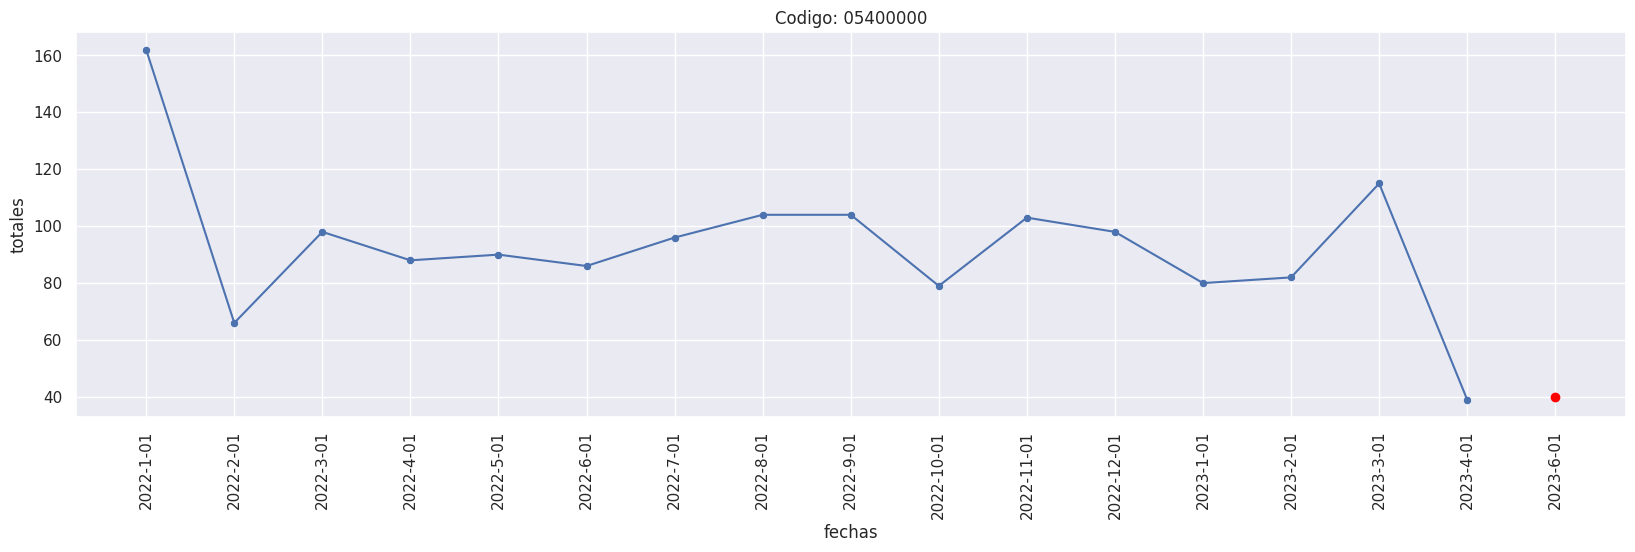

In [91]:
plt.figure(figsize=(20, 5))
sns.set(color_codes=True)
plt.xticks(rotation=90)
sns.scatterplot(x='fechas', y='totales', data=df_graf)
plt.scatter(x=(str(anio_in)+'-'+str(mes_in)+'-01'), y=pred, color='red')
plt.plot(df_graf.fechas, df_graf.totales)
plt.title("Codigo: "+codigo_in)
plt.show()